In [1]:
from keras_preprocessing import image
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

folders = ['real_fake_datasets/real_and_fake_face/fake', 'real_fake_datasets/real_and_fake_face/real']

images = []
labels = []

def load_dataset(folder):
    for filename in os.listdir(folder):
        try:
            img = cv2.imread(os.path.join(folder, filename))
            img = cv2.resize(img, (300,300))
            img = image.img_to_array(img)
            label = folder.split(os.path.sep)[-1]
            images.append(img)
            labels.append(label)
        except:
            continue

for folder in folders:
    load_dataset(folder)
x = np.array(images)/255
y = np.array(labels)
print(x.shape)
print(y.shape)

(2041, 300, 300, 3)
(2041,)


In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#integer encoder
integer_encoded = LabelEncoder().fit_transform(y)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
print(integer_encoded.shape)

#One hot encoding (binary encoded)
onehot_encoder = OneHotEncoder(sparse=False).fit_transform(integer_encoded)
y = np.array(onehot_encoder)


(2041, 1)


In [3]:
from sklearn.model_selection import train_test_split

(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size=0.15, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1734, 300, 300, 3)
(307, 300, 300, 3)
(1734, 2)
(307, 2)


In [4]:
#Convolution NN
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
from keras.models import Sequential

n_classes = len(folders)

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(300,300,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Activation('relu'))


model.add(Conv2D(32, (3, 3) ,activation='relu'))
model.add(MaxPooling2D(pool_size = (3, 3)))


model.add(Conv2D(70, (3, 3) ,activation='relu'))
model.add(MaxPooling2D(pool_size = (3, 3)))

model.add(Conv2D(70, (3, 3) ,activation='relu'))
model.add(Conv2D(120, (3, 3) ,activation='relu'))
model.add(Conv2D(64, (3, 3) ,activation='relu'))
model.add(MaxPooling2D(pool_size = (3, 3)))



model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
print(model.summary())

Using TensorFlow backend.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
activation (Activation)      (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 70)        20230     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (

Epoch 1/5
55/55 [==============================] - 27s 485ms/step - loss: 0.6927 - accuracy: 0.5306
Epoch 2/5
55/55 [==============================] - 33s 608ms/step - loss: 0.6919 - accuracy: 0.5306
Epoch 3/5
55/55 [==============================] - 34s 622ms/step - loss: 0.6916 - accuracy: 0.5306
Epoch 4/5
55/55 [==============================] - 25s 460ms/step - loss: 0.6919 - accuracy: 0.5306
Epoch 5/5
55/55 [==============================] - 25s 462ms/step - loss: 0.6916 - accuracy: 0.5306


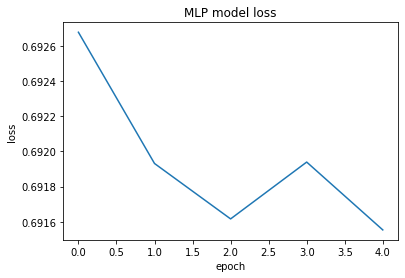

In [5]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32)
plt.plot(history.history['loss'])
plt.title('MLP model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [6]:
# result = model.predict_classes(x_test, batch_size=32, verbose=1)
# print(result)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
10/10 [==============================] - 2s 171ms/step
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[0.6919370889663696, 0.524429976940155]


In [1]:
model.save('model.h5')

NameError: name 'model' is not defined

In [ ]:
from keras.models import load_model
#import user folder
'''
images = []
load_dataset('/content/test_image')
x = np.array(images)/255
'''
#load model
h5model = load_model('/content/model.h5')
y_model = h5model.predict(x)

score_model = h5model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: ", score_model[0]*100, "%")

In [ ]:
plt.figure(figsize=(16,16))
'''
for i in range(6):
  plt.subplot(1, 6, i+1)
  plt.imshow(x[i])
  plt.title("Label: {}\nPredicted: {}".format(np.argmax(y_test[i]), np.argmax(y_model[i])))
  plt.axis('off')
plt.show()
'''